In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import time
from scipy.stats import laplace, norm
from scipy.optimize import curve_fit
from scipy.stats import ks_2samp
plt.style.use('paper.mplstyle')
%matplotlib inline

In [2]:
resKSthresh = 1.8e-7

dfres = pd.read_csv('../csvs/resonant_summary.csv', index_col=0)
dfres = dfres[(dfres['Mean'] > 4) & (dfres['Mean'] < 7)]
res_valid_gaus_params = dfres[dfres['KSpval'] > resKSthresh]
res_valid_gaus_params.shape

(197, 7)

In [3]:
randKSthresh = 4.6e-27

dfrand = pd.read_csv('../csvs/random_summary.csv', index_col=0)
dfrand = dfrand[(dfrand['Mean'] > 4) & (dfrand['Mean'] < 7)]
random_valid_gaus_params = dfrand[dfrand['KSpval'] > randKSthresh]
random_valid_gaus_params.shape

(233, 7)

In [4]:
print(norm.fit(res_valid_gaus_params["Sigma"]))
print(norm.fit(random_valid_gaus_params["Sigma"]))


combined_sigma = np.concatenate([res_valid_gaus_params["Sigma"], random_valid_gaus_params["Sigma"]])

mu_fit, sig_fit =  norm.fit(combined_sigma)

print("Best mu: {0} and best sigma: {1}".format(mu_fit, sig_fit))

x = np.linspace(0, combined_sigma.max(), 100)
prob_sig = norm.pdf(x, mu_fit, sig_fit)

(0.42021391068752817, 0.15777923545198638)
(0.44230426801179024, 0.16858518510246)
Best mu: 0.4321838019818376 and best sigma: 0.16409264190223485


In [5]:
trimmed_random_info_left_tail= random_valid_gaus_params[(random_valid_gaus_params["Mean"] < 5) &
                                                   (random_valid_gaus_params["Mean"] > 4) ]
trimmed_random_info_right_tail= random_valid_gaus_params[(random_valid_gaus_params["Mean"] < 7) &
                                                   (random_valid_gaus_params["Mean"] > 6) ]


trimmed_res_info_left_tail= res_valid_gaus_params[(res_valid_gaus_params["Mean"] < 5) &
                                                   (res_valid_gaus_params["Mean"] > 4) ]
trimmed_res_info_right_tail= res_valid_gaus_params[(res_valid_gaus_params["Mean"] < 7) &
                                                   (res_valid_gaus_params["Mean"] > 6) ]

Ks_2sampResult(statistic=0.1254003180758589, pvalue=0.06232098764748373)
Ks_2sampResult(statistic=0.1392857142857143, pvalue=0.1956593964401212)


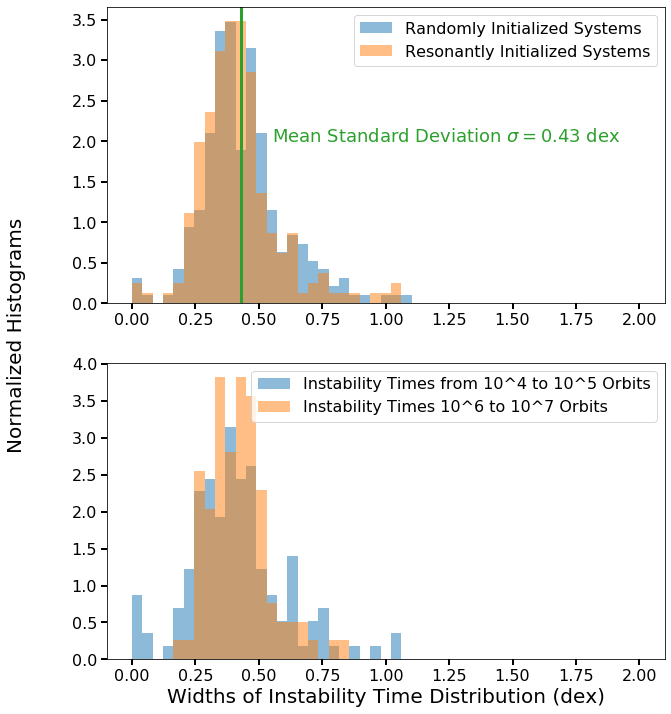

In [6]:
fig , (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 12))
cmap = plt.get_cmap("tab10")

bins = np.linspace(0, 2, 50)
ax1.hist(random_valid_gaus_params["Sigma"], alpha = 0.5, bins = bins , label = "Randomly Initialized Systems", density = 1)
ax1.hist(res_valid_gaus_params["Sigma"], alpha = 0.5, bins = bins, label = "Resonantly Initialized Systems", density = 1)
print(ks_2samp(random_valid_gaus_params["Sigma"], res_valid_gaus_params["Sigma"]))
ax1.legend(loc="upper right")
ax1.axvline(0.43, c=cmap(2), lw=3)
ax1.text(0.55, 2, 'Mean Standard Deviation $\sigma=0.43$ dex', c=cmap(2), fontsize=18)

lower_sigmas = np.concatenate([trimmed_random_info_left_tail["Sigma"], trimmed_res_info_left_tail["Sigma"]])
# middle_sigmas = np.concatenate([trimmed_random_info_middle["Sigma"], trimmed_res_info_middle["Sigma"]])
higher_sigmas = np.concatenate([trimmed_random_info_right_tail["Sigma"], trimmed_res_info_right_tail["Sigma"]])

bins = np.linspace(0, 2, 50)
ax2.hist(lower_sigmas, alpha = 0.5, bins = bins , label = "Instability Times from 10^4 to 10^5 Orbits", density = 1, histtype='stepfilled')
ax2.hist(higher_sigmas, alpha = 0.5, bins = bins, label = "Instability Times 10^6 to 10^7 Orbits", density = 1, histtype='stepfilled')

print(ks_2samp(lower_sigmas, higher_sigmas))
ax2.legend(loc="upper right")
ax2.set_xlabel("Widths of Instability Time Distribution (dex)")
fig.text(0.0, 0.5, 'Normalized Histograms', ha='center', va='center', rotation='vertical', size = 20)
fig.savefig('fig3.pdf', bbox_inches='tight')